# Regressão 01 - tarefa 02 - transformações em X e Y

### 1. Melhorando o ajuste no percentual de gorjetas

a. Vamos partir do modelo feito na última tarefa, o que relaciona ```tip_pct``` e ```net_bill```. Carregue a base, os pacotes e reproduza este modelo aqui.

In [23]:
from statistics import LinearRegression

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.formula.api as smf
from statsmodels.formula.api import  ols
import statsmodels.api as sm
%matplotlib inline
plt.rc('figure', figsize=(6, 4))

In [24]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


(0.0, 10.5)

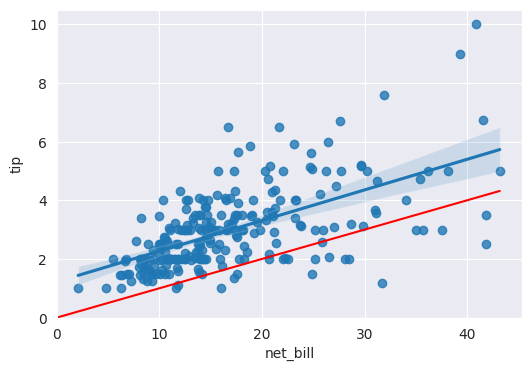

In [25]:
# Gráfico de dispersão
sns.regplot(y = 'tip', x = 'net_bill', data = tips[tips['tip_pct']<.5])

# Gerando dados para a linha dos 10%
x = np.linspace(0,tips['net_bill'].max(),100)
y = .1*x

# Plotando a linha dos 10%
plt.plot(x, y, '-r', label='linha dos 10%')

# Opções estéticas para explicitar o (0,0) no gráfico
plt.xlim(left = 0)
plt.ylim(bottom = 0)

a linha azul no gráfico com uma área sombreada ao redor, representando a relação estimada entre net_bill e tip, com base em um ajuste de regressão linear. A área sombreada indica o intervalo de confiança para a estimativa.
A linha vermelha é uma linha de referência adicionada manualmente, representando uma taxa fixa de 10% do valor da conts.

esse grafico mostra que as gorjetas esta mais concentrado entre 10 a 15% e baixo,

In [26]:
reg2 = smf.ols('tip_pct ~ net_bill', data = tips).fit()
reg2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.52e-06
Time:                        17:36:39   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.000       0.260       0.351
net_bill      -0.0061      0.001     -4.931      0.000      -0.009      -0.004
==============================================================================
Omnibus:                      468.674   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           234437.604
Skew:                          11.104   Prob(JB):                         0.00
Kurtosis:                     153.221   Cond. No.                         43.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: xlabel='net_bill', ylabel='tip_pct'>

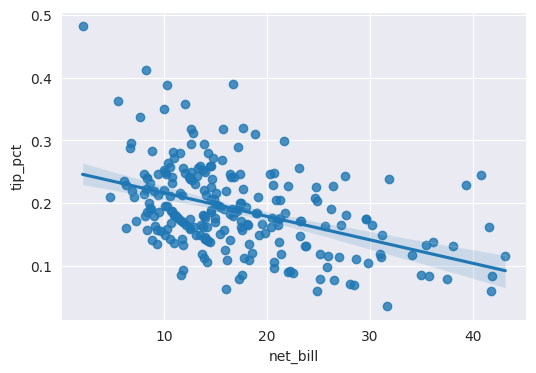

In [27]:
# Gráfico de dispersão
sns.regplot(y = 'tip_pct', x = 'net_bill', data = tips[tips['tip_pct']<.5])

no grafico vemos essa linha azul ela representa um intervalo de confianca

### 2. ajuste o modelo de ```tip_pct``` em função do logaritmo de ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.202
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     61.16
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.62e-13
Time:                        17:36:45   Log-Likelihood:                 123.81
No. Observations:                 244   AIC:                            -243.6
Df Residuals:                     242   BIC:                            -236.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.6181      0.054     11.444   

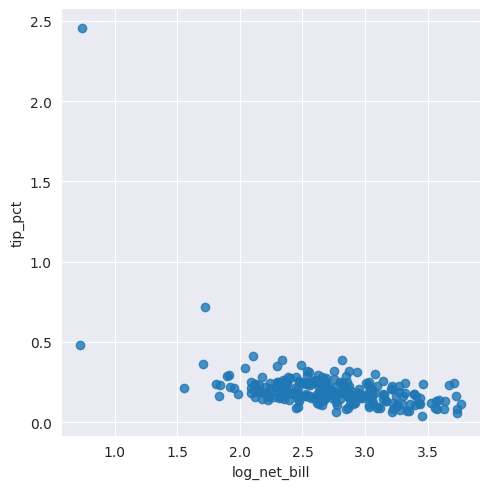

In [28]:


tips['log_net_bill'] = np.log(tips['net_bill'])
model_tip_pct_log_net_bill = sm.OLS(tips['tip_pct'], sm.add_constant(tips['log_net_bill'])).fit()
print(model_tip_pct_log_net_bill.summary())

sns.lmplot(x='log_net_bill', y='tip_pct', data=tips, fit_reg=False)





R-squared: Indica que cerca de 20% da variabilidade na gorjeta (tip_pct) pode ser explicada pela conta (net_bill) transformada para escala logarítmica.

Coeficientes: O coeficiente da variável log_net_bill indica a mudança média na gorjeta por uma unidade de aumento no logaritmo natural da conta. O coeficiente constante representa o valor esperado da gorjeta quando a conta é igual a 1 (em escala logarítmica).

P-valor: O p-valor muito baixo (próximo de zero) indica que o coeficiente da variáve log_net_bill é estatisticamente significante, ou seja, a relação entre as variáveis não é por acaso


###  3. ajuste o modelo de ```tip_pct``` em função de um polinômio de segundo grau em ```net_bill```.

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.151
Method:                 Least Squares   F-statistic:                     22.55
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           1.06e-09
Time:                        18:02:11   Log-Likelihood:                 117.25
No. Observations:                 244   AIC:                            -228.5
Df Residuals:                     241   BIC:                            -218.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.4851      0.047  

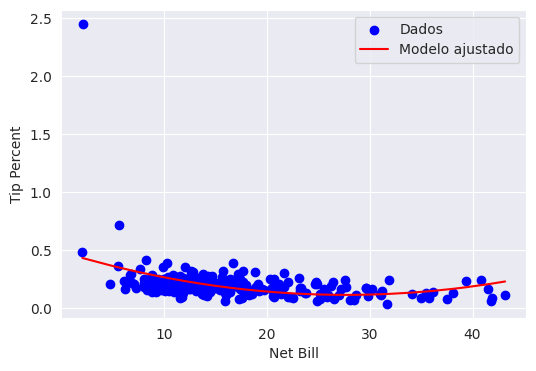

In [54]:
# criando o polinomio de segundo grau para net_bill
tips['net_bill_squared'] = tips['net_bill'] ** 2

# configurando x (termos independentes)
x = sm.add_constant(tips[['net_bill', 'net_bill_squared']]) # adiciona o intercepto
y = tips['tip_pct'] # variavel dependente

#ajustando o modelo de regressao
model = sm.OLS(y, x).fit()

# exibindo os resultados do modelo
print(model.summary())

# grafico do modelo ajustado
plt.scatter(tips['net_bill'], tips['tip_pct'], color='blue', label='Dados')
sorted_net_bill = np.sort(tips['net_bill'])
fitted_values = model.predict(sm.add_constant(pd.DataFrame( {
    'net_bill': sorted_net_bill,
    'net_bill_squared': sorted_net_bill ** 2,
})))
plt.plot(sorted_net_bill, fitted_values, color='red', label='Modelo ajustado')
plt.xlabel('Net Bill')
plt.ylabel('Tip Percent')
plt.legend()
plt.show()

###  4. ajuste um modelo no log do ```tip_pct``` em função de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           8.27e-16
Time:                        17:36:50   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2749      0.056    -22.872      0.0

<Axes: xlabel='net_bill', ylabel='tip_pct'>

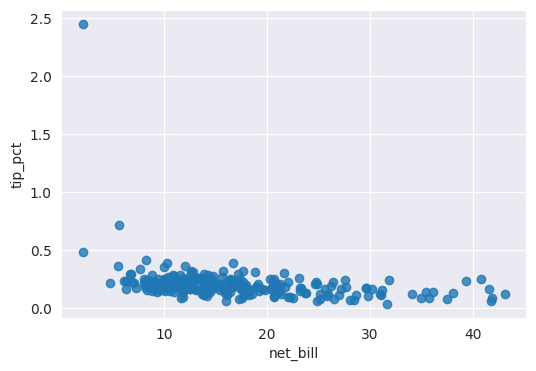

In [29]:
# Criar a variável log_tip_pct
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# Ajustar modelo de regressão linear
X = sm.add_constant(tips['net_bill'])  # Adicionar intercepto
y = tips['log_tip_pct']

# Modelo usando Statsmodels
model = sm.OLS(y, X).fit()

# Resumo do modelo
print(model.summary())

# Calcular R² no espaço original para tip_pct
y_pred_log = model.predict(X)  # Previsões em escala log
y_pred_tip_pct = np.exp(y_pred_log)  # Voltar ao espaço original
ss_total = np.sum((tips['tip_pct'] - tips['tip_pct'].mean()) ** 2)
ss_residual = np.sum((tips['tip_pct'] - y_pred_tip_pct) ** 2)

r2_tip_pct = 1 - (ss_residual / ss_total)
print(f"R² para tip_pct no espaço original: {r2_tip_pct:.4f}")


sns.regplot(x='net_bill', y='tip_pct', data=tips, fit_reg=False)



a variavel independente(net_bill) indica um valor de 0.235 que significa que cerca de 23.5% da variacao na porcentagem da gorjeta se explicada no valor da conta.

F-statistic e Prob (F-statistic): Esses valores são utilizados para testar a hipótese nula de que não existe relação linear entre as variáveis. Um valor de p muito baixo (8.27e-16) indica que rejeitamos a hipótese nula, ou seja, há evidência estatística de que existe uma relação linear entre o valor da conta e a porcentagem da gorjeta.

Coeficientes: net_bill indica a mudança média no logaritmo natural da porcentagem da gorjeta para cada aumento de uma unidade no valor da conta. Um coeficiente negativo indica uma relação negativa, ou seja, à medida que o valor da conta aumenta, a porcentagem da gorjeta tende a diminuir.

O gráfico de dispersão complementa a análise da tabela de resultados. Ele visualiza a relação entre as duas variáveis. Cada ponto no gráfico representa um cliente, com a posição horizontal indicando o valor da conta e a posição vertical indicando a porcentagem da gorjeta.

Dispersão dos pontos: A dispersão dos pontos sugere que a relação entre as variáveis não é perfeita. Existem muitos pontos que não se encaixam exatamente em uma linha reta, o que indica que outros fatores além do valor da conta podem influenciar a porcentagem da gorjeta.

Tendência geral: Apesar da dispersão, é possível observar uma tendência geral de que a porcentagem da gorjeta diminui à medida que o valor da conta aumenta.


###  5. ajuste um modelo no log do ```tip_pct``` em função do log de ```net_bill```. Calcule o $R^2$ também em ```tip_pct```.

                            OLS Regression Results                            
Dep. Variable:            log_tip_pct   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sun, 29 Dec 2024   Prob (F-statistic):           5.20e-20
Time:                        17:39:06   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.3942      0.133     -2.961   

<Axes: xlabel='log_net_bill', ylabel='log_tip_pct'>

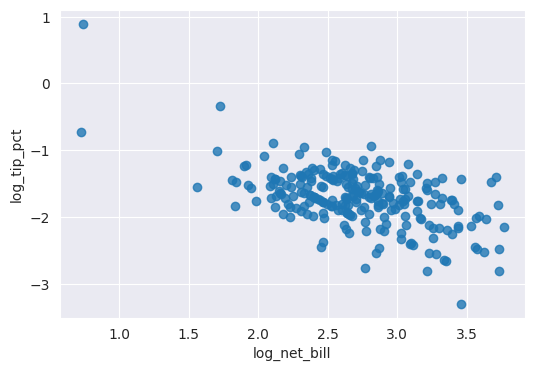

In [38]:
# 1. Calcular os logaritmos
tips['log_net_bill'] = np.log(tips['net_bill'])
tips['log_tip_pct'] = np.log(tips['tip_pct'])

# 2. Ajustar o modelo de regressão linear
X = sm.add_constant(tips['log_net_bill'])  # Adicionando constante para o modelo
y = tips['log_tip_pct']

model = sm.OLS(y, X).fit()

# 3. Calcular e imprimir os parâmetros e o R²
print(model.summary())

# Alternativamente, imprimir os valores específicos:
r_squared = model.rsquared
print(f"R² do modelo: {r_squared}")

sns.regplot(x='log_net_bill', y='log_tip_pct', data=tips, fit_reg=False)



O coeficiente da variável log_net_bill é negativo, o que indica uma relação negativa entre as duas variáveis. Isso significa que, à medida que o valor da conta aumenta, a porcentagem da gorjeta tende a diminuir

O R-squared de 0.293 sugere que aproximadamente 29.3% da variabilidade na porcentagem da gorjeta pode ser explicada pela variação no valor da conta. Embora seja uma relação estatisticamente significativa (P-valor próximo de zero), a proporção da variância explicada não é muito alta, indicando que outros fatores também influenciam a decisão de dar gorjeta.

O valor de F-statistic e o P-valor associado a ele indicam que a relação entre as variáveis é estatisticamente significativa. Ou seja, a probabilidade de encontrar uma relação tão forte ou mais forte por acaso é muito pequena.

O gráfico de dispersão corrobora os resultados da regressão. Os pontos no gráfico representam cada observação (cada conta e sua respectiva gorjeta). A tendência geral é de que os pontos se espalhem ao longo de uma linha com inclinação negativa, o que visualiza a relação negativa entre as duas variáveis.

Em média, os clientes tendem a deixar uma porcentagem menor de gorjeta em contas mais altas. No entanto, é importante ressaltar que essa é uma relação média e que existem muitas outras variáveis que podem influenciar a decisão de dar gorjeta, como a qualidade do serviço, a satisfação do cliente, a cultura local, entre outros.


###  6. qual modelo resultou no melhor ajuste?

In [ ]:
# modelo que teve um melhor ajuste foi a questao 5
# pelo fato da conta esta muito alta o cliente
# deixa uma gorjeta menor